#전복 나이 예측
- https://dacon.io/competitions/official/235877/data

1. train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이

2. test.csv : 테스트 데이터
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게

3. sample_submissoin.csv : 제출 양식
- id : 샘플 아이디
- Target : 전복 나이

# 1.데이터 확인

In [ ]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate

In [ ]:
# 데이터 불러오기
train = pd.read_csv('train.csv').iloc[:, 1:] # 모델 학습 파일
test = pd.read_csv('test.csv').iloc[:, 1:] # 모델 시험지 파일
submission = pd.read_csv('sample_submission.csv') #답안지 파일 
display(train)
display(test)
submission

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6
...,...,...,...,...,...,...,...,...,...
1248,I,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
1249,I,0.395,0.310,0.085,0.3170,0.1530,0.0505,0.0935,7
1250,F,0.525,0.410,0.115,0.7745,0.4160,0.1630,0.1800,7
1251,F,0.445,0.335,0.110,0.4355,0.2025,0.1095,0.1195,6


,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,F,0.595,0.470,0.155,1.1210,0.4515,0.1780,0.1550
1,M,0.580,0.450,0.150,0.9270,0.2760,0.1815,0.3600
2,I,0.260,0.205,0.070,0.0970,0.0415,0.0190,0.0305
3,M,0.590,0.460,0.130,1.1020,0.4550,0.2055,0.3300
4,F,0.595,0.465,0.140,1.1130,0.5175,0.2440,0.3050
...,...,...,...,...,...,...,...,...
2919,I,0.170,0.105,0.035,0.0340,0.0120,0.0085,0.0050
2920,I,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060
2921,I,0.570,0.450,0.135,0.7940,0.3815,0.1415,0.2450
2922,I,0.460,0.350,0.120,0.4885,0.1930,0.1050,0.1550


,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2919,2920,0
2920,2921,0
2921,2922,0
2922,2923,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1253 non-null   object 
 1   Lenght          1253 non-null   float64
 2   Diameter        1253 non-null   float64
 3   Height          1253 non-null   float64
 4   Whole Weight    1253 non-null   float64
 5   Shucked Weight  1253 non-null   float64
 6   Viscra Weight   1253 non-null   float64
 7   Shell Weight    1253 non-null   float64
 8   Target          1253 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 88.2+ KB


##결측치 확인

In [ ]:
train.describe()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [ ]:
import seaborn as sns
from io import StringIO
import missingno as msno
import matplotlib.pyplot as plt

## 그래프 그려보기

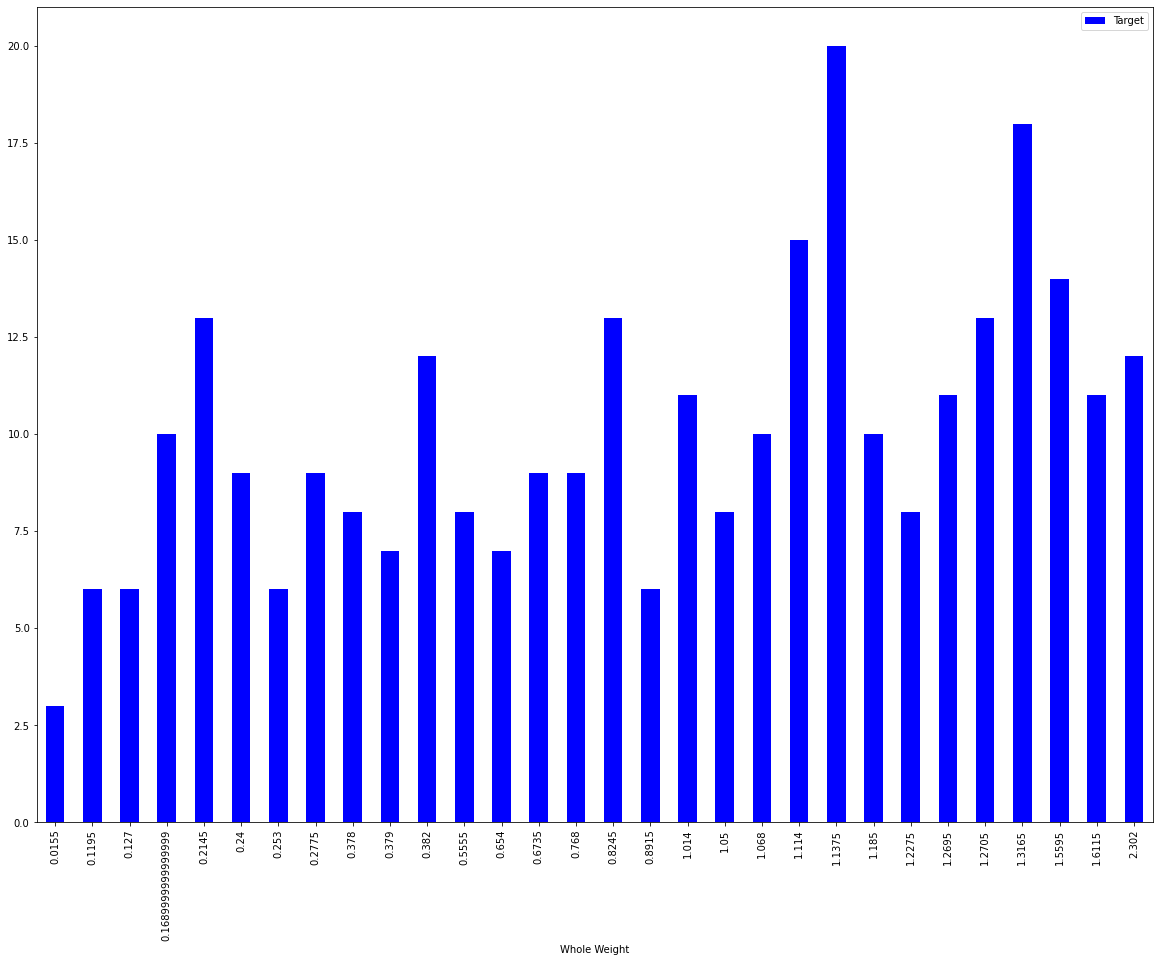

In [ ]:
# 전복 무게와 타겟
train[['Whole Weight', 'Target']].head(30).groupby('Whole Weight').mean().plot(kind = "bar", rot = 90, color='BLUE', figsize=(20, 15))

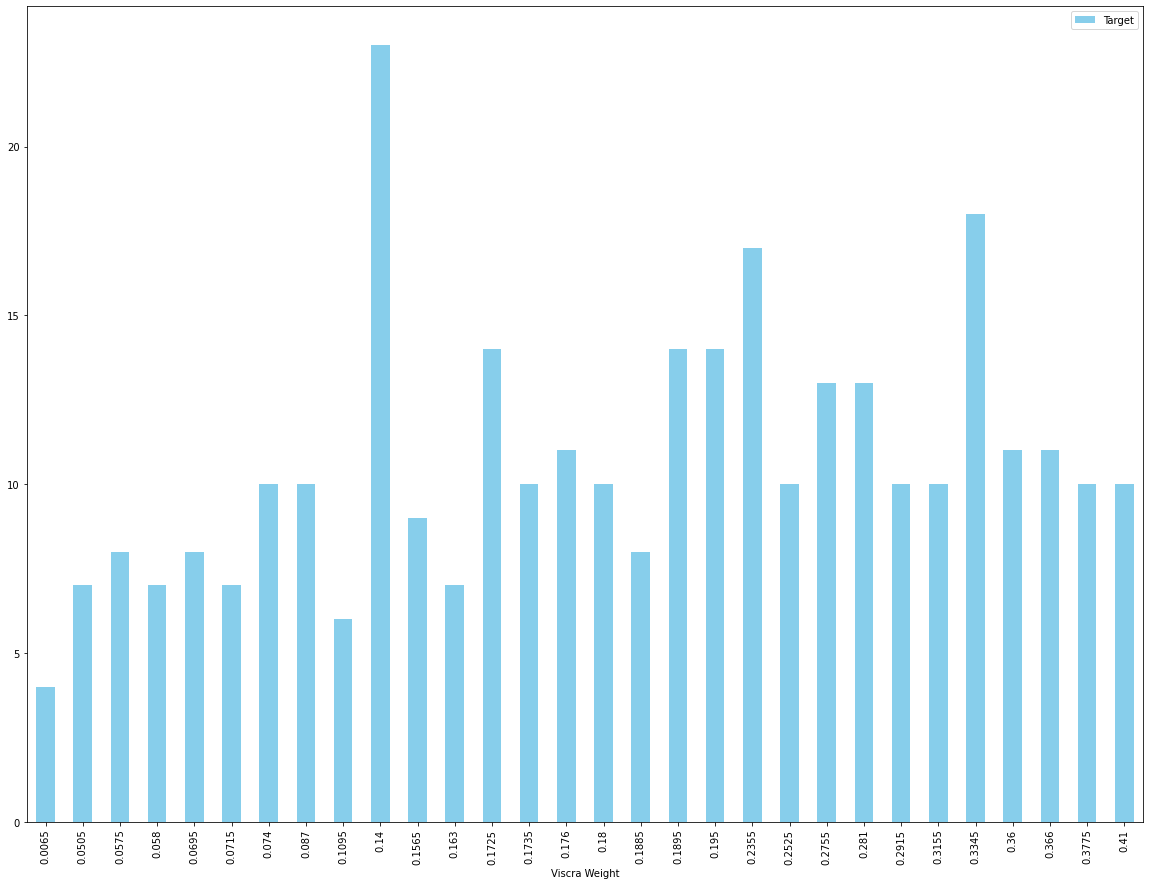

In [ ]:
# 전복 내장 무게와 타겟
train[['Viscra Weight', 'Target']].tail(30).groupby('Viscra Weight').mean().plot(kind = "bar", rot = 90, color='SKYBLUE', figsize=(20, 15))

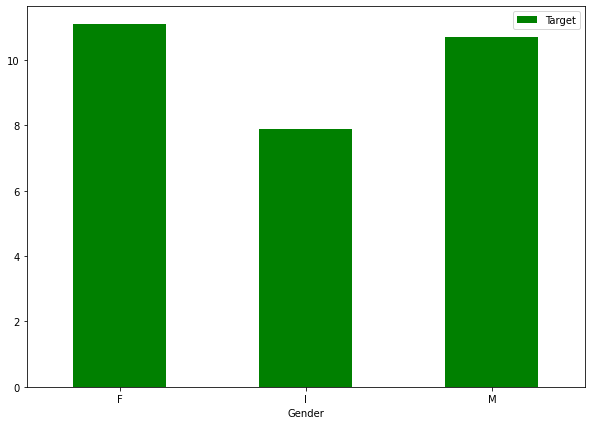

In [ ]:
train[['Gender', 'Target']].groupby('Gender').mean().plot(kind = "bar", rot = 0, color='g', figsize=(10, 7))

# 2.전처리

## 이상치 처리

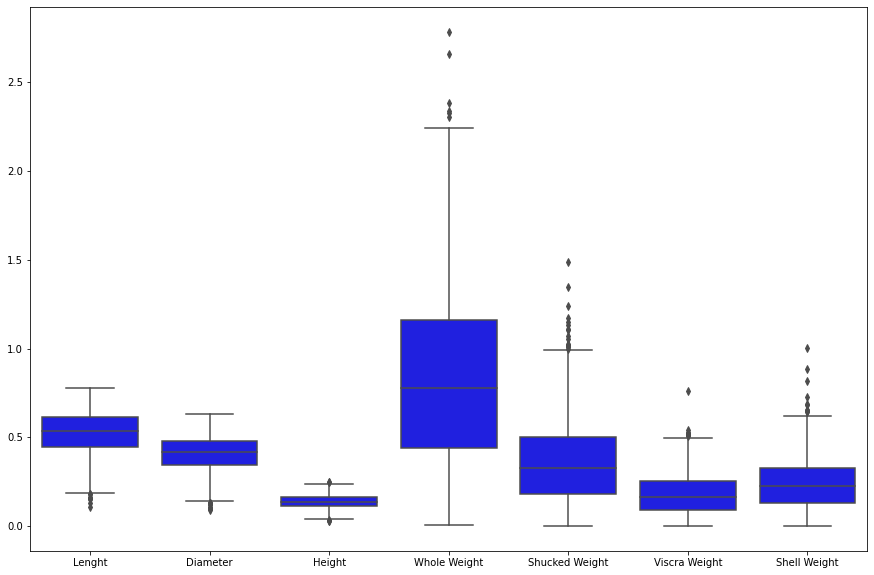

In [ ]:
import matplotlib.pyplot as plt
train_box = train.iloc[:, :8]
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_box, color='b')
plt.show()

In [ ]:
# 함수 정의
def removeQutlier(frm, column_list):
    for column in column_list:
        q1 = frm[column].quantile(0.25)   #이 값을 1사분위 값으로 지정
        q3 = frm[column].quantile(0.75)   #이 값을 3사분위 값으로 지정
        # print(q1, q3)
        
        tmp_frm = frm
        #IOR - 1사분위 ~ 3사분위
        iqr = 1.5*(q3-q1)
        # print("iqr:", iqr)
        tmp_frm[column][ (tmp_frm[column] > (q3 + iqr)) | (tmp_frm[column] < (q3 - iqr))] = None
    
    return tmp_frm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


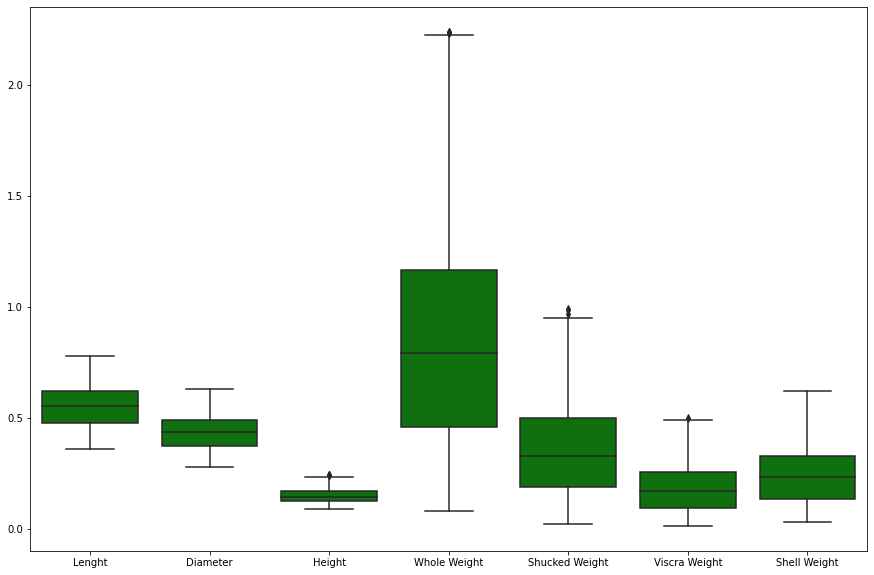

In [ ]:
# 함수 적용
train_after = train.copy()

train_after = removeQutlier(train_after, ['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight'])

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_after.iloc[:, :8], color='green')
plt.show()

AxesSubplot(0.125,0.125;0.698618x0.755)


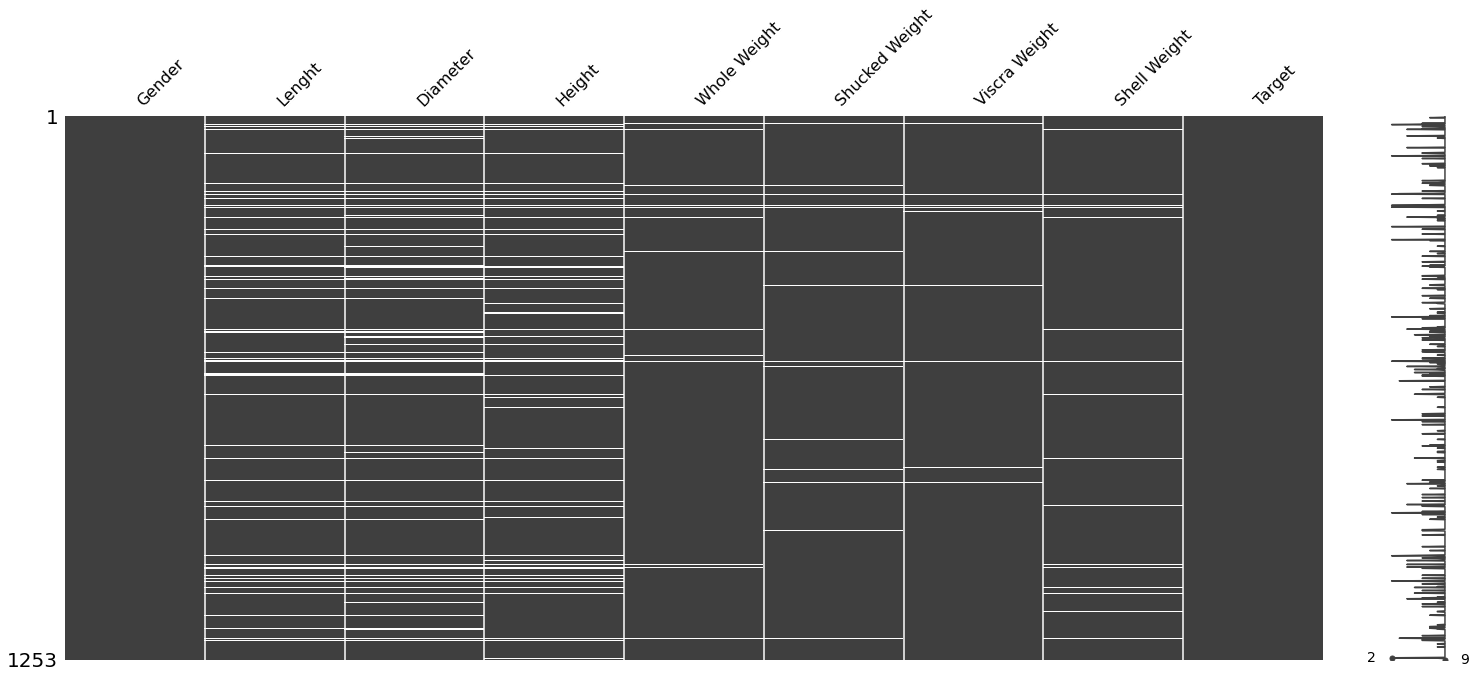

In [ ]:
print(msno.matrix(train_after))

## 결측치 처리

In [ ]:
from sklearn.impute import SimpleImputer

# 평균 값으로 결측데이터  만약 most_frequent면 최빈값
imputer = SimpleImputer(strategy="mean")

def simpleImputer(df, column_list):
    for column in column_list:
        df[column] = imputer.fit_transform(df[[column]])

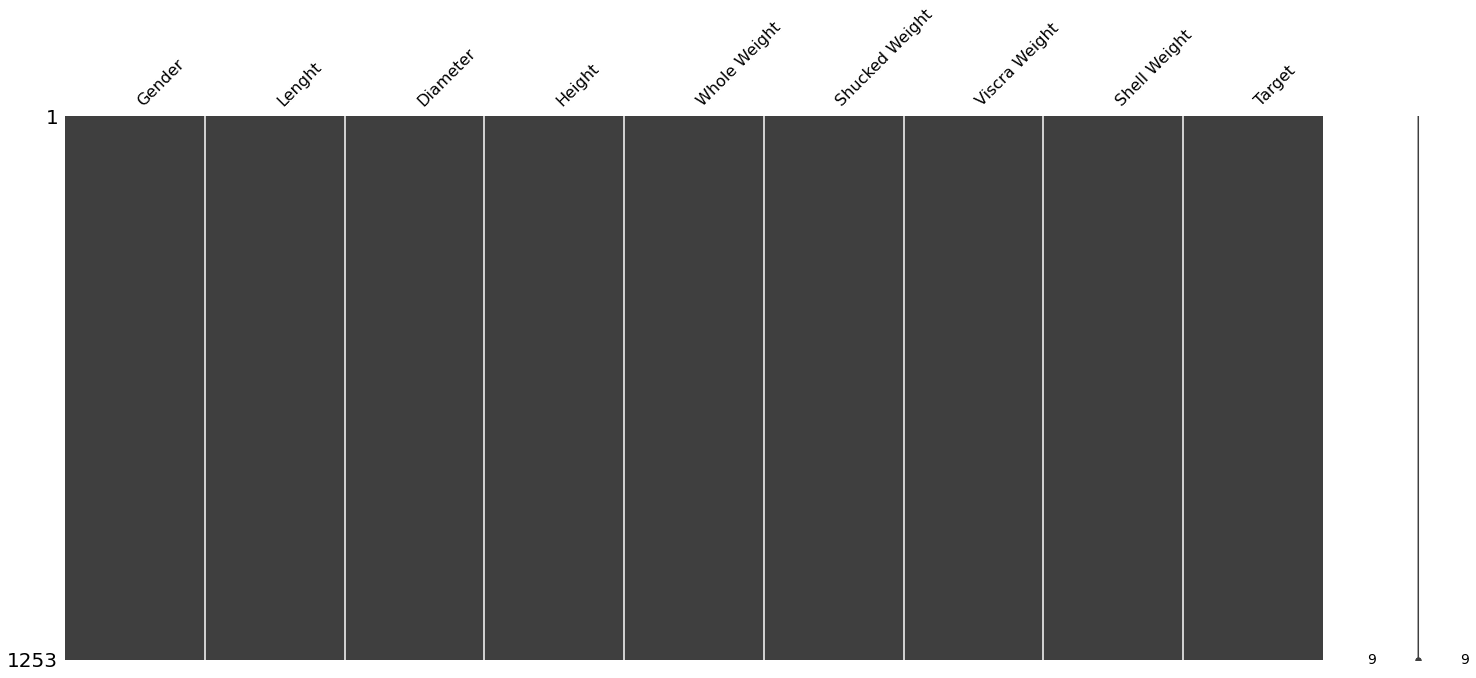

In [ ]:
simpleImputer(train_after, ['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight'])

msno.matrix(train_after)
plt.show()

## 데이터 변환

In [ ]:
test

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,F,0.595,0.470,0.155,1.1210,0.4515,0.1780,0.1550
1,M,0.580,0.450,0.150,0.9270,0.2760,0.1815,0.3600
2,I,0.260,0.205,0.070,0.0970,0.0415,0.0190,0.0305
3,M,0.590,0.460,0.130,1.1020,0.4550,0.2055,0.3300
4,F,0.595,0.465,0.140,1.1130,0.5175,0.2440,0.3050
...,...,...,...,...,...,...,...,...
2919,I,0.170,0.105,0.035,0.0340,0.0120,0.0085,0.0050
2920,I,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060
2921,I,0.570,0.450,0.135,0.7940,0.3815,0.1415,0.2450
2922,I,0.460,0.350,0.120,0.4885,0.1930,0.1050,0.1550


In [ ]:
# 성별 데이터 더미 처리
gender_train = pd.get_dummies(train_after['Gender'])
gender_test = pd.get_dummies(test['Gender'])

In [ ]:
# 데이터 프레임 병합
concat_train = pd.concat([train_after, gender_train],axis=1)
concat_test = pd.concat([test, gender_test],axis=1)

In [ ]:
# 컬럼 삭제
concat_train.drop(['Gender', 'Target'], axis=1, inplace=True)
concat_test.drop(['Gender'], axis=1, inplace=True)

In [ ]:
# 타겟 로그 변환
import numpy as np

concat_train["Target"] = np.log1p(train_after["Target"])

In [ ]:
display(concat_train)
display(concat_test)

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,F,I,M,Target
0,0.605000,0.470000,0.115000,1.11400,0.39250,0.291000,0.31000,0,0,1,2.772589
1,0.430000,0.315000,0.095000,0.37800,0.17500,0.080000,0.10450,0,1,0,2.197225
2,0.580000,0.490000,0.195000,1.31650,0.53050,0.254000,0.41000,0,1,0,2.944439
3,0.535000,0.405000,0.175000,1.27050,0.54800,0.326500,0.33700,0,0,1,2.639057
4,0.548704,0.431509,0.090000,0.12700,0.04800,0.031000,0.04000,0,1,0,1.945910
...,...,...,...,...,...,...,...,...,...,...,...
1248,0.548704,0.431509,0.147342,0.84188,0.35447,0.180312,0.24224,0,1,0,1.609438
1249,0.395000,0.310000,0.147342,0.31700,0.15300,0.050500,0.09350,0,1,0,2.079442
1250,0.525000,0.410000,0.115000,0.77450,0.41600,0.163000,0.18000,1,0,0,2.079442
1251,0.445000,0.335000,0.110000,0.43550,0.20250,0.109500,0.11950,1,0,0,1.945910


,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,F,I,M
0,0.595,0.470,0.155,1.1210,0.4515,0.1780,0.1550,1,0,0
1,0.580,0.450,0.150,0.9270,0.2760,0.1815,0.3600,0,0,1
2,0.260,0.205,0.070,0.0970,0.0415,0.0190,0.0305,0,1,0
3,0.590,0.460,0.130,1.1020,0.4550,0.2055,0.3300,0,0,1
4,0.595,0.465,0.140,1.1130,0.5175,0.2440,0.3050,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2919,0.170,0.105,0.035,0.0340,0.0120,0.0085,0.0050,0,1,0
2920,0.435,0.345,0.115,0.4180,0.2220,0.0735,0.1060,0,1,0
2921,0.570,0.450,0.135,0.7940,0.3815,0.1415,0.2450,0,1,0
2922,0.460,0.350,0.120,0.4885,0.1930,0.1050,0.1550,0,1,0


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# items = train_after['Gender']
# encoder = LabelEncoder()
# encoder.fit(items)
# labels = encoder.transform(items)
# print(labels)

# item_test = test['Gender']
# encoder.fit(item_test)
# labels_test = encoder.transform(item_test)
# print(labels_test)

In [ ]:
# train_data = train_after.copy()
# test_data = test.copy()

# train_data['Gender'] = labels
# test_data['Gender'] = labels_test
# test_data

In [ ]:
# print(encoder.inverse_transform([0, 1, 2]))
# en = {'F':0, 'I':1, 'M':2}

In [ ]:
concat_train[['F', 'I', 'M']]

,F,I,M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1248,0,1,0
1249,0,1,0
1250,1,0,0
1251,1,0,0


In [ ]:
concat_train = concat_train.astype({'F': 'int'})
concat_train = concat_train.astype({'I': 'int'})
concat_train = concat_train.astype({'M': 'int'})
concat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lenght          1253 non-null   float64
 1   Diameter        1253 non-null   float64
 2   Height          1253 non-null   float64
 3   Whole Weight    1253 non-null   float64
 4   Shucked Weight  1253 non-null   float64
 5   Viscra Weight   1253 non-null   float64
 6   Shell Weight    1253 non-null   float64
 7   F               1253 non-null   int64  
 8   I               1253 non-null   int64  
 9   M               1253 non-null   int64  
 10  Target          1253 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 107.8 KB


In [ ]:
concat_test = concat_test.astype({'F': 'int'})
concat_test = concat_test.astype({'I': 'int'})
concat_test = concat_test.astype({'M': 'int'})
concat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lenght          2924 non-null   float64
 1   Diameter        2924 non-null   float64
 2   Height          2924 non-null   float64
 3   Whole Weight    2924 non-null   float64
 4   Shucked Weight  2924 non-null   float64
 5   Viscra Weight   2924 non-null   float64
 6   Shell Weight    2924 non-null   float64
 7   F               2924 non-null   int64  
 8   I               2924 non-null   int64  
 9   M               2924 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 228.6 KB


## 상관관계

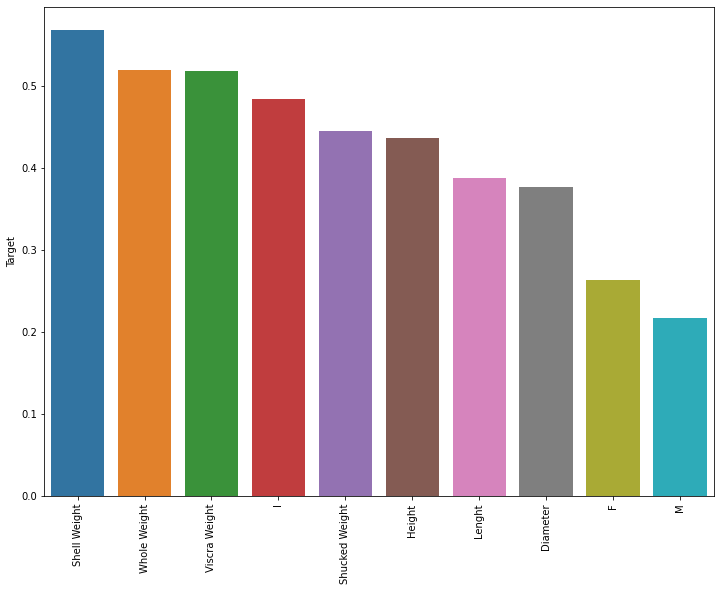

In [ ]:
plt.figure(figsize=(12,9))
plt.xticks(rotation = 90)
sns.barplot(x = abs(concat_train.corr()["Target"]).sort_values(ascending = False)[1:].index ,
            y = abs(concat_train.corr()["Target"]).sort_values(ascending = False)[1:]) # target을 제외하고 나머지와의 상관관계 시각화

# 3.학습 & 예측

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets        import load_iris, load_breast_cancer
#데이터 분류 함수
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve
#분류 알고리즘
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression, LinearRegression
from sklearn.impute          import SimpleImputer
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import seaborn as sns
from io import StringIO
import missingno as msno
import matplotlib.pyplot as plt

## LinearRegression

In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(concat_train.iloc[:, :10],
                                                    concat_train.iloc[:, 10],
                                                   test_size=0.2,
                                                    random_state=78)
print("X_train : ", len(X_train))
print("X_test : ", len(X_test))
print()
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

#기울기 및 절편, 정확도 등 확인
print("기울기 : " , linear_model.coef_)
print()
print('절편   : ' , linear_model.intercept_)
print()
print('모델의 신뢰도 - ')
y_squared = linear_model.score(X_test, Y_test)
print(y_squared)

X_train :  1002
X_test :  251

기울기 :  [-0.62603687 -0.53878628  0.55071017  0.11824784 -0.39416522  0.62276345
  1.10620027  0.05670423 -0.10779186  0.05108763]

절편   :  2.501527061695213

모델의 신뢰도 - 
0.4149103118713665


In [355]:
lr_pred = linear_model.predict(concat_test)
submission['Target'] = np.expm1(lr_pred)
submission.to_csv('lr_midel3.csv', index=False)
submission

,id,Target
0,1,8.413902
1,2,11.569208
2,3,7.912903
3,4,10.715790
4,5,10.444394
...,...,...
2919,2920,8.413902
2920,2921,7.504751
2921,2922,8.053261
2922,2923,8.124266


## DecisionTree

In [338]:
X_train, X_test, y_train, y_test = train_test_split(concat_train.iloc[:, :10],
                                                    train.iloc[:, 8],
                                                   test_size=0.2,
                                                   random_state=100)

gscv_dtc_model = DecisionTreeClassifier()
param = {
        'criterion':['gini', 'entropy'],
        'max_depth': [2,3],  #깊이 - 트리의 노드 갯수
        'min_samples_split': [2, 3], #스플릿 갯수
        'splitter':['random', 'best']
}

grid_tree = GridSearchCV(gscv_dtc_model,
                        param_grid = param,
                        cv = 5,
                        refit = True)

# ValueError: Unknown label type: 'continuous'
# 레이블 타입이 연속적(continuous)이기 때문에 에러가 발생했다는 뜻입니다.

In [339]:
grid_tree = grid_tree.fit(X_train, y_train)

dt_model = grid_tree.best_estimator_
predictions = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print('모델의 신뢰도 - ')
y_squ = dt_model.score(X_test, y_test)
print(y_squared)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


모델의 신뢰도 - 
0.22709163346613545


In [319]:
print('예측 - ')
dt_pred = dt_model.predict(concat_test)

submission['Target'] = dt_pred
submission.to_csv('dt_midel1.csv', index=False)
submission

예측 - 


,id,Target
0,1,8
1,2,10
2,3,5
3,4,10
4,5,10
...,...,...
2919,2920,5
2920,2921,8
2921,2922,9
2922,2923,8


## RandomForestRegressor

In [325]:
# 랜덤 포레스트 모형 설정
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

model100 = RandomForestRegressor(n_estimators=100, random_state=40)
model105 = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=50) #나무 수, 과적합, 랜덤 고정
model250 = RandomForestRegressor(n_estimators=250)
model305 = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=60) #나무 수, 과적합, 랜덤 고정

X_train = concat_train.iloc[:, :10]
Y_train = concat_train.iloc[:, 10]
X_test = concat_test

# 모델 학습
model100.fit(X_train, Y_train)
model105.fit(X_train, Y_train)
model250.fit(X_train, Y_train)
model305.fit(X_train, Y_train)

# 모델 예측
y_pred6 = model100.predict(concat_test)
y_pred7 = model105.predict(concat_test)
y_pred8 = model250.predict(concat_test)
y_pred9 = model305.predict(concat_test)

## XGBRegressor
-https://wooono.tistory.com/97

In [ ]:
!pip install cmake
!pip install xgboost

In [301]:
X_train, X_test, y_train, y_test = train_test_split(concat_train.iloc[:, :10],
                                                    concat_train.iloc[:, 10],
                                                   test_size=0.2, 
                                                    random_state=78)

param_grid = {
    "gamma": uniform(0, 0.5).rvs(3),
    "max_depth": [2, 3],
    'min_samples_split': [2, 3],
    "n_estimators": randint(100, 150).rvs(3), # default 100
}

grid = GridSearchCV(xgb.XGBRegressor(),
                    cv=5, n_jobs=-1,
                    param_grid=param_grid,
                    refit=True)

grid = grid.fit(X_train, y_train)

xgbr_model = grid.best_estimator_
predictions = xgbr_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("MAE", mae)
print()
print('모델의 신뢰도 - ')
y_squared = xgbr_model.score(X_test, y_test)
print(y_squared)

[05:07:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE 0.1358037339793345

모델의 신뢰도 - 
0.6328604361308783


In [302]:
y_squared = grid.score(X_test, y_test)
print(y_squared)

0.6328604361308783


In [ ]:
score_frm = pd.DataFrame(grid_tree.cv_results_)
score_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005195,0.001220,0.003553,0.001639,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.184080,0.199005,0.205,0.205,0.220,0.202617,0.011578,19
1,0.006129,0.002272,0.002862,0.000118,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.203980,0.189055,0.205,0.215,0.190,0.200607,0.009837,22
2,0.006627,0.003979,0.002826,0.000178,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.184080,0.228856,0.210,0.200,0.190,0.202587,0.015828,20
3,0.004453,0.000080,0.003703,0.001894,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.203980,0.189055,0.205,0.215,0.190,0.200607,0.009837,22
4,0.004160,0.000197,0.003072,0.000561,gini,2,2,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.228856,0.258706,0.260,0.245,0.245,0.247512,0.011331,7
5,0.005262,0.000528,0.002703,0.000118,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.238806,0.228856,0.250,0.215,0.210,0.228532,0.014786,12
6,0.004651,0.000940,0.002704,0.000112,gini,2,3,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.174129,0.228856,0.225,0.235,0.205,0.213597,0.022147,16
7,0.005610,0.000615,0.003366,0.001003,gini,2,3,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.238806,0.228856,0.250,0.215,0.210,0.228532,0.014786,12
8,0.004144,0.000076,0.002975,0.000229,gini,3,2,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.213930,0.283582,0.295,0.250,0.205,0.249502,0.035993,6
9,0.007182,0.002652,0.002899,0.000158,gini,3,2,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.258706,0.243781,0.275,0.280,0.235,0.258498,0.017340,1


In [ ]:
print("최적의 파라미터 확인")
print(grid_tree.best_params_)
print()
print("최적의 파라미터의 정확도")
print(grid_tree.best_score_)
print()
print()
print(grid_tree.best_estimator_)
print(grid_tree.best_index_)

최적의 파라미터 확인
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}

최적의 파라미터의 정확도
0.25849751243781094


DecisionTreeClassifier(max_depth=3)
9


In [344]:
xgbr_pred = xgbr_model.predict(concat_test)
submission['Target'] = np.expm1(xgbr_pred)
submission = submission.astype('int')
submission.to_csv('xgb_midel2.csv', index=False)
submission #0.15403

,id,Target
0,1,9
1,2,11
2,3,6
3,4,10
4,5,9
...,...,...
2919,2920,5
2920,2921,6
2921,2922,9
2922,2923,9


## 앙상블 도전

In [ ]:
!pip install catboost
!pip install ngboost

     |████████████████████████████████| 76.1 MB 56 kB/s 
     |████████████████████████████████| 349 kB 13.5 MB/s 
     |████████████████████████████████| 81 kB 10.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=a2ba751e6b0a9c252f0ee9654f348f3a750799654a12bca8aeeb9617208fd7a9
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor

### AdaBoost (Adaptive Boosting)

- GradientBoosting 처럼 내부에 약한 성능의 분류기를 가지는 앙상블 모델이다.
- GradientBoosting이 이전 분류기가 만든 잔여 오차에 대해 새로운 분류기를 만들었다면, AdaBoost는 이전의 분류기가 잘못 분류한 샘플에 대해서 가중치를 높여서 다음 모델을 훈련시킨다. 반복마다 샘플에 대한 가중치를 수정하는 것이다.
- 훈련된 각 분류기는 성능에 따라 가중치가 부여되고, 예측에서 각 분류기가 예측한 레이블을 기준으로 가중치까지 적용해 가장 높은 값을 가진 레이블을 선택한다.
- 순차적 학습을 해야하는 만큼 병령수행은 불가능하다.
- https://inuplace.tistory.com/583

In [343]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(concat_train.iloc[:, :10],
                                                    train.iloc[:, 8],
                                                   test_size=0.2,
                                                   random_state=7)

ada_clf = ada_clf.fit(X_train, y_train)
print('모델의 신뢰도 - ')
y_squared = ada_clf.score(X_test, y_test)
print(y_squared)

ada_pred = ada_clf.predict(concat_test)

모델의 신뢰도 - 
0.22310756972111553


### MLPRegressor

In [ ]:
mlp_model = MLPRegressor(random_state = 42, activation = 'tanh')

X_train, X_test, y_train, y_test = train_test_split(concat_train.iloc[:, :10],
                                                    concat_train.iloc[:, 10],
                                                   test_size=0.2)

mlp_model = mlp_model.fit(X_train, y_train)
print('모델의 신뢰도 - ')
y_squared = mlp_model.score(X_test, y_test)
print(y_squared)

모델의 신뢰도 - 
0.3789312490010386


In [362]:
mlp_pred = mlp_model.predict(concat_test)
mlp_pred

array([2.50359562, 2.47099534, 1.8650768 , ..., 2.23612504, 2.11894551,
       2.49462592])

### GradientBoostingClassifier

- 임의의 미분 가능한 손실 함수의 최적화를 허용합니다.
- 각 단계에서 n_classes_ 회귀 트리는 이항 또는 다항 이탈 손실 함수의 음의 기울기에 적합합니다.
- 이진 분류는 단일 회귀 트리만 유도되는 특수한 경우입니다.
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,
                                    criterion='friedman_mse',
                                    max_depth=3, max_leaf_nodes=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    max_features=None)

X_train, X_test, y_train, y_test = train_test_split(concat_train.iloc[:, :10],
                                                    train.iloc[:, 8],
                                                   test_size=0.2,
                                                   random_state=78)

gb_clf = gb_clf.fit(X_train, y_train)
print('모델의 신뢰도 - ')
y_squared = gb_clf.score(X_test, y_test)
print(y_squared)

gb_pred = gb_clf.predict(concat_test)

모델의 신뢰도 - 
0.22709163346613545


### XGBClassifier

- https://blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431714122&from=search&redirect=Log&widgetTypeCall=true&directAccess=false

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(booster='gbtree', 
            colsample_bylevel=0.9, 
            colsample_bytree=0.8, 
            gamma=0, 
            max_depth=8, 
            min_child_weight=3, 
            n_estimators=50, 
            nthread=4, 
            objective='binary:logistic', 
            random_state=2, 
            silent= True)

X_train, X_test, y_train, y_test = train_test_split(concat_train.iloc[:, :10],
                                                    train.iloc[:, 8],
                                                   test_size=0.2)

xgb_clf = xgb_clf.fit(X_train, y_train)

print('모델의 신뢰도 - ')
y_squared = xgb_clf.score(X_test, y_test)
print(y_squared)

xgb_pred = xgb_clf.predict(concat_test)
xgb_pred

모델의 신뢰도 - 
0.2788844621513944


array([10, 14,  5, ...,  9, 14,  9])

### 반복 뽑기

In [ ]:
score = []
for i in range(1, 501):
    print("반복 ", i)
    xgb_clf = XGBClassifier(booster='gbtree', 
            colsample_bylevel=0.9, 
            colsample_bytree=0.8, 
            gamma=0, 
            max_depth=8, 
            min_child_weight=3, 
            n_estimators=50, 
            nthread=4, 
            objective='binary:logistic', 
            random_state=2, 
            silent= True)

    X_train, X_test, y_train, y_test = train_test_split(concat_train.iloc[:, :10],
                                                        train.iloc[:, 8],
                                                    test_size=0.2,
                                                    random_state=i)
    xgb_clf = xgb_clf.fit(X_train, y_train)
    print('모델의 신뢰도 - ')
    y_squared = xgb_clf.score(X_test, y_test)
    print(y_squared)
    
    score.append(y_squared)

In [ ]:
print("구한 신뢰도 길이 : ", (len(score)))
print("최대 신뢰도 : ", max(score))
m = max(score)
score.index(m)

구한 신뢰도 길이 :  500
최대 신뢰도 :  0.30278884462151395


125

# 4.저장

## RandomForestRegressor 예측 저장

In [ ]:
submission['Target'] = np.expm1(y_pred6)
submission.to_csv('rf_midel6.csv', index=False)
submission

,id,Target
0,1,8.117063
1,2,12.446102
2,3,6.761462
3,4,11.216186
4,5,10.390088
...,...,...
2919,2920,7.053390
2920,2921,6.595556
2921,2922,9.513132
2922,2923,9.651325


In [ ]:
submission['Target'] = np.expm1(y_pred7)
submission.to_csv('rf_midel7.csv', index=False)
submission

,id,Target
0,1,9.091769
1,2,12.264846
2,3,6.092692
3,4,10.361709
4,5,10.063997
...,...,...
2919,2920,6.172390
2920,2921,7.391686
2921,2922,9.347608
2922,2923,8.934488


In [ ]:
submission['Target'] = np.expm1(y_pred8)
submission.to_csv('rf_midel8.csv', index=False)
submission

,id,Target
0,1,8.391676
1,2,12.351787
2,3,6.681695
3,4,11.054483
4,5,10.369530
...,...,...
2919,2920,6.731317
2920,2921,6.685416
2921,2922,9.513611
2922,2923,9.793049


In [ ]:
submission['Target'] = np.expm1(y_pred9)
submission.to_csv('rf_midel9.csv', index=False)
submission

,id,Target
0,1,9.019096
1,2,11.931712
2,3,6.393274
3,4,10.383912
4,5,10.057761
...,...,...
2919,2920,6.390870
2920,2921,7.423686
2921,2922,9.215087
2922,2923,8.897347


## 예측된 값 모두 합치기

In [373]:
submission['Target'] = (np.expm1(lr_pred) + np.expm1(xgbr_pred)) / 2
submission = submission.astype('int')
submission.to_csv('mean_midel3.csv', index=False)
submission # 0.15555

,id,Target
0,1,8
1,2,11
2,3,7
3,4,10
4,5,10
...,...,...
2919,2920,7
2920,2921,7
2921,2922,8
2922,2923,8


- 참고 사이트
https://dacon.io/competitions/open/235539/codeshare/1534?page=1&dtype=vote